<a href="https://colab.research.google.com/github/SamuelSousaFerreira/Modelos-de-Classificacao-KNN-Reg-logistica/blob/main/Modelos_de_Classifica%C3%A7%C3%A3o_Flai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Modelos de Classificação**

In [1]:
#bibliotecas que serão usadas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## **1 - Importando e conhecendo os Dados**





In [2]:
dados = pd.read_csv('https://raw.githubusercontent.com/ricardorocha86/Datasets/master/Custos%20M%C3%A9dicos/insurance.csv')

In [3]:
dados.shape

(1338, 7)

In [4]:
dados.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
dados.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [6]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
dados['smoker'] = dados['smoker'].map({'yes':1,"no":0}) #substitui a string por valor numérico, variável continuas sendo categórica
dados['charges'] = dados['charges']/1000 # divide por 1000 para facilitar os cálculo, isso não influência na análise e modelagem 
dados.head() #conferindo

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,1,southwest,16.884924
1,18,male,33.770,1,0,southeast,1.725552
2,28,male,33.000,3,0,southeast,4.449462
3,33,male,22.705,0,0,northwest,21.984471
4,32,male,28.880,0,0,northwest,3.866855


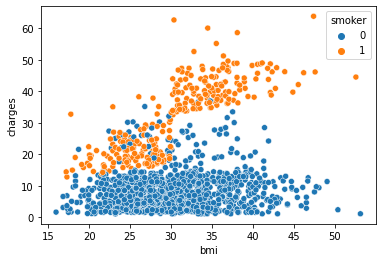

In [8]:
sns.scatterplot(x='bmi', y='charges',data=dados, hue='smoker')

Visualmente, levando em conta apenas 2 variáveis, os fumantes estão acima de 10 no eixo y. Abaixo de 10 as chances de ser fumante são nulas ou quase.

### Separando em dados em variáveis explicativas X e alvo y

In [9]:
X = dados[['bmi', 'charges']]
y = dados.smoker

In [10]:
X.head()

,bmi,charges
0,27.900,16.884924
1,33.770,1.725552
2,33.000,4.449462
3,22.705,21.984471
4,28.880,3.866855


In [11]:
y.head()

0    1
1    0
2    0
3    0
4    0
Name: smoker, dtype: int64

# **2 - Validação Cruzada**

In [12]:
#importando as Bibliotecas
from sklearn.model_selection import KFold, cross_val_score

In [15]:
kf = KFold(n_splits=1338, shuffle=True)

## **2.1 -  Regressão Logística**

In [16]:
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression()

### **Desempenho do Modelo**

In [17]:
acuracia = cross_val_score(log_model, X, y,cv=kf, scoring='accuracy')

In [ ]:
rl = (acuracia.mean() *100).round(2)

print(f'A acurácia do modelo de Regressão Logística é de {rl} %')

A acurácia do modelo de Regressão Logística é de 93.27 %


### **Região de Decisão**

In [18]:
from mlxtend.plotting import plot_decision_regions

In [19]:
log_model = LogisticRegression()
log_model.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


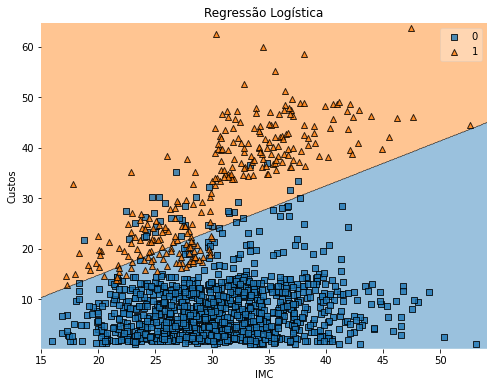

In [20]:
#fazendo o gráfico
plt.figure(figsize=(8,6))
plot_decision_regions(X.values, y.values, clf=log_model, legend=1)
plt.xlabel('IMC')
plt.ylabel('Custos')
plt.title('Regressão Logística')
plt.show()

Abaixo da reta é classificado como não fumante e acima como fumante.

## **2.2 - KNN**

In [21]:
from sklearn.neighbors import KNeighborsClassifier

In [22]:
knn_model = KNeighborsClassifier(n_neighbors=255)

acuracia_knn = cross_val_score(knn_model, X, y, cv=kf, scoring='accuracy')

In [23]:
knn5 = (acuracia_knn.mean() *100).round(2)
print(f'A acurácia do modelo KNN é de {knn5} %')

A acurácia do modelo KNN é de 90.13 %


### **Região de decisão**

In [24]:
knn_model.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=255, p=2,
                     weights='uniform')

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


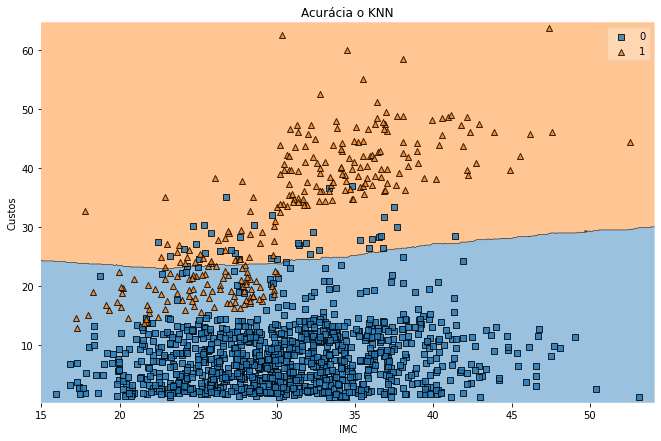

In [25]:
plt.figure(figsize=(11,7))
plot_decision_regions(X.values, y.values, clf=knn_model, legend=1)
plt.xlabel('IMC')
plt.ylabel('Custos')
plt.title('Acurácia o KNN')
plt.show()


### **KNN com 25-NN** 

In [27]:
nome= '25-NN'
knn_model_25 = KNeighborsClassifier(n_neighbors=25)
acuracia_knn_25 = cross_val_score(knn_model_25,X,y,cv=kf, scoring='accuracy')

In [33]:
knn_25= acuracia_knn_25.mean()

print('Acurácia do modelo com ' + nome + ' :{:.2f}%'.format(100*knn_25))

Acurácia do modelo com 25-NN :96.19%


#### **Região de Decisão**

In [34]:
knn_model_25.fit(X,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=25, p=2,
                     weights='uniform')

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


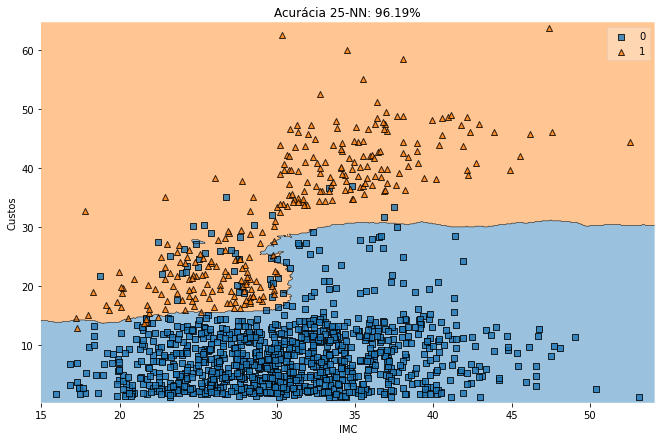

In [35]:
plt.figure(figsize=(11,7))
plot_decision_regions(X.values, y.values, clf=knn_model_25, legend=1)
plt.xlabel('IMC')
plt.ylabel('Custos') 
plt.title('Acurácia ' + nome+ ': {:.2f}%'.format(100*knn_25))
plt.show()

##**2.3 - Árvores de Decisão**

### **Implementação do Modelo**

In [36]:
from sklearn.tree import  DecisionTreeClassifier

In [38]:
tree_model = DecisionTreeClassifier(max_depth=3)

acuracia_tree = cross_val_score(tree_model,X,y,cv=kf, scoring='accuracy')

acuracia_tree = acuracia_tree.mean()

print('Acurácia da àrvode de Decisão é de : {:.2f}%'.format(100*acuracia_tree))


Acurácia da àrvode de Decisão é de : 96.34%


###**Região de Decisão**

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


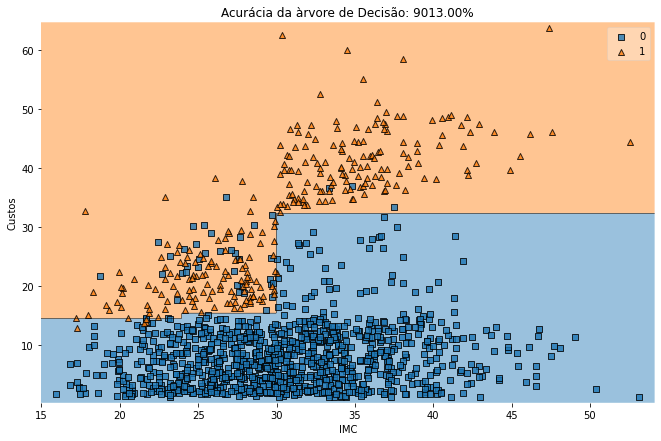

In [42]:
tree_model.fit(X,y)

plt.figure(figsize = (11, 7))
plot_decision_regions(X.values, y.values, clf = tree_model, legend = 1)
plt.xlabel('IMC')
plt.ylabel('Custos')
plt.title('Acurácia da àrvore de Decisão: {:.2f}%'.format(100*knn5 ))  
plt.show()

### **Plotando a árvore de decisão**

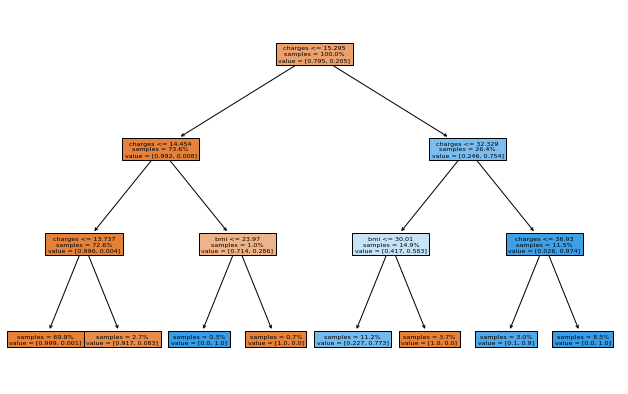

In [43]:
from sklearn.tree import plot_tree

plt.figure(figsize=(11,7))
plot_tree(tree_model,filled=True, proportion=True, impurity=False, 
          feature_names=X.columns)

plt.show()


# **3 - Medidas**

### **LogistRegression**

In [44]:
log_model = LogisticRegression()
log_model.fit(X,y)
preditos = log_model.predict(X)
preditos

array([0, 0, 0, ..., 0, 0, 1])

In [47]:
from sklearn.metrics import confusion_matrix
matriz_conf = confusion_matrix(y, preditos)
matri_conf

array([[1029,   35],
       [  54,  220]])

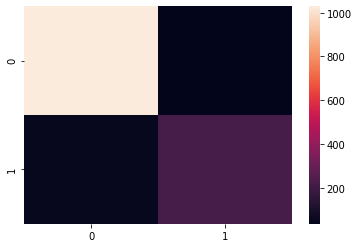

In [48]:
sns.heatmap(data=matriz_conf)

In [49]:
matriz_conf.flatten() #retorna os valores em uma dimensão

array([1029,   35,   54,  220])

In [50]:
vn, fp, fn, vp = matriz_conf.flatten()

print('VP: {}'.format(vp))
print('VN: {}'.format(vn))
print('FP: {}'.format(fp))
print('FN: {}'.format(fn))
print('\nTOTAL: {}'.format(fn+fp+vn+vp))

VP: 220
VN: 1029
FP: 35
FN: 54

TOTAL: 1338


In [51]:
def MetricasClassBinaria(observado, predito, custo=None):
  matriz_conf = confusion_matrix(observado, predito)
  vn, fp, fn,vp = matriz_conf.flatten()

  acc = (vn+vp)/(vn+fp+fn+vp)
  sen = vp/(vp+fn)
  esp = vn/(vn+fp)
  efi = (sen + esp)/2

  print('                  Acurácia: {:.4f}'.format(acc))
  print('             Sensibilidade: {:.4f}'.format(sen))
  print('            Especificidade: {:.4f}'.format(esp)) 
  print('                Eficiência: {:.4f}'.format(efi))
  
  metricas = { 'acurácia': acc, 'sensibilidade': sen, 
                'especificidade': esp, 'eficiência': efi}
  
  return metricas

In [52]:
modelo1 = MetricasClassBinaria(y,preditos)

                  Acurácia: 0.9335
             Sensibilidade: 0.8029
            Especificidade: 0.9671
                Eficiência: 0.8850


### **KNN**

In [55]:
knn_model_25 = KNeighborsClassifier(n_neighbors=25)
knn_model_25.fit(X,y)
preditos = knn_model_25.predict(X)

modelo2 = MetricasClassBinaria(y, preditos)


                  Acurácia: 0.9649
             Sensibilidade: 0.9781
            Especificidade: 0.9615
                Eficiência: 0.9698


### **Decision Tree**

In [56]:
tree_model = DecisionTreeClassifier(max_depth=3)
tree_model.fit(X,y)
preditos = tree_model.predict(X)

modelo3 = MetricasClassBinaria(y,preditos)

                  Acurácia: 0.9686
             Sensibilidade: 0.9854
            Especificidade: 0.9643
                Eficiência: 0.9748


# **4 - Conclusão**

In [58]:
resultados0 = {'Regressão Logística': list(modelo1.values()),
              '25-Vizinhos + Próximos': list(modelo2.values()),
              'Árvore de Decisão': list(modelo3.values())}

In [62]:
resultados = pd.DataFrame(resultados0, index=modelo1.keys()).T
resultados

,acurácia,sensibilidade,especificidade,eficiência
Regressão Logística,0.933483,0.802920,0.967105,0.885012
25-Vizinhos + Próximos,0.964873,0.978102,0.961466,0.969784
Árvore de Decisão,0.968610,0.985401,0.964286,0.974844


In [64]:
from google.colab.data_table import DataTable

In [65]:
DataTable(resultados.round(3))

,acurácia,sensibilidade,especificidade,eficiência
Regressão Logística,0.933,0.803,0.967,0.885
25-Vizinhos + Próximos,0.965,0.978,0.961,0.970
Árvore de Decisão,0.969,0.985,0.964,0.975


**Pergunta: Esses resultados podem estar apresentando overfitting?**

Resposta: Sim! Porquê não houve amostra de teste, somente de treino. Os modelos devem ser testados com dados que não foram usados na modelagem para confirmar que de fato aprenderam a prever ou se apenas decoraram os dados.